# Problem statement: using the social, economic and health factors determine the overall development of the country

Introduction to problem:
Development of a country is calculated by the United Nations using Human Development Index (HDI)

# Importing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('C:\\Users\\abc\\Desktop\\ml project\\Country-data.csv')

In [2]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Analyzing data

About the various columns of the Dataset:

1. Country: Name of the country
2. child_mort: Death of children under 5 years of age per 100..
3. exports: Exports of goods and services per capita
4. health: Total health spending per capita.
5. imports: Imports of goods and services per capita
6. income: Net income per person
7. inflation: The measurement of the annual growth rate
8. life_expec: the number of years a person can expect to live
9. total_fer: the number of live births per 1,000 women
10. gdpp: The GDP per capita

In [3]:
dataset.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [4]:
dataset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


1. Average death of children under age 5 in every 100 people: 38.27
2. Average life expectancy: 70.56 
3. Average exports of goods and services per capita: 41.11
4. Average imports of goods and services per capita: 46.89 (which is > avg. exports)
5. Average net income per person: 17144.69
6. Average inflation: 7.78 (has a wide spread ranging from min -4.21 till +104)
7. Average GDP per capita: 12964.15 

# Heatmap showing correlation between various development indicators

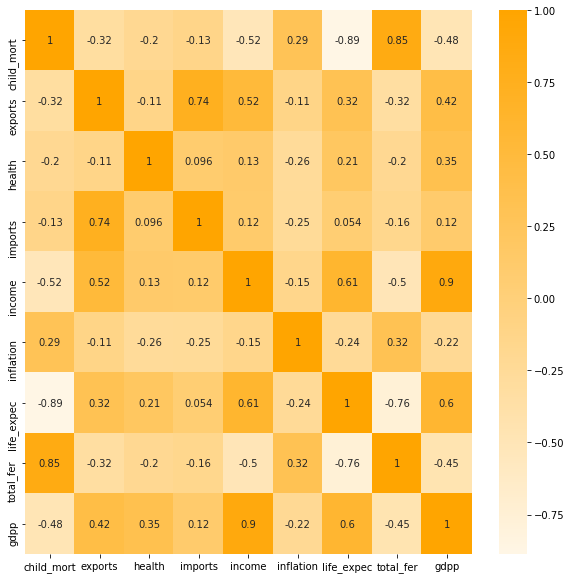

In [5]:
import seaborn as sns
corr = dataset.corr()
f,ax= plt.subplots(figsize=(10,10))
cmap = sns.light_palette('orange', as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap)

# Countries with highest life expectancy

In [6]:
life_asc=dataset.sort_values(by=['life_expec'],ascending=False)

In [7]:
life_bar=life_asc.head()

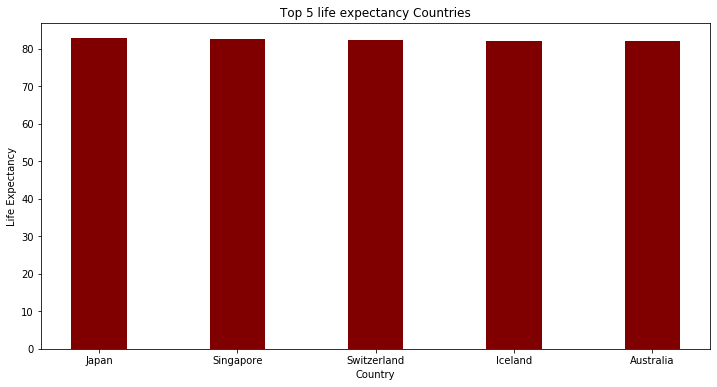

In [8]:
plt.figure(figsize=(12,6))
plt.bar(life_bar.iloc[:,0], life_bar.iloc[:,7], color ='maroon',  
        width = 0.4)
plt.xlabel("Country") 
plt.ylabel("Life Expectancy") 
plt.title("Top 5 life expectancy Countries") 
plt.show() 

<b> Japan has the highest life expectancy in the world </b>

# Top 5 largest health spending countries

In [9]:
health=dataset.sort_values(by=['health'],ascending=False)

In [10]:
health_bar=health.head()

In [11]:
health_bar

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.0,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.8,11.9,28.1,36900,1.050,81.4,2.03,40600


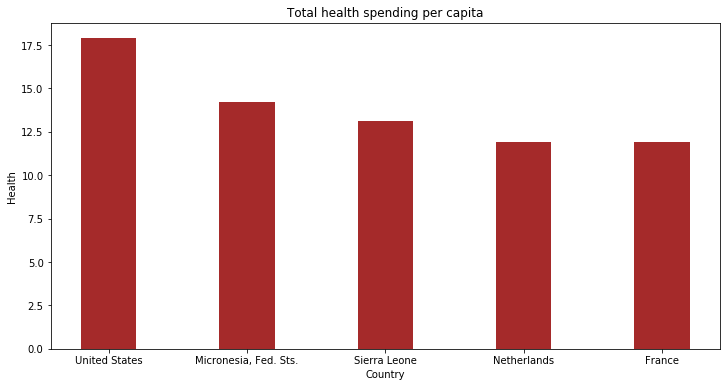

In [12]:
plt.figure(figsize=(12,6))
plt.bar(health_bar.iloc[:,0], health_bar.iloc[:,3], color ='brown',  
        width = 0.4)
plt.xlabel("Country") 
plt.ylabel("Health") 
plt.title("Total health spending per capita") 
plt.show() 

<b> United States spends the most in health in the whole world </b>

# Countries with highest inflation

In [13]:
most_inflation=dataset.sort_values(by=['inflation'],ascending=False)

In [14]:
most_inflation_bar=most_inflation.head()

In [15]:
most_inflation_bar

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100


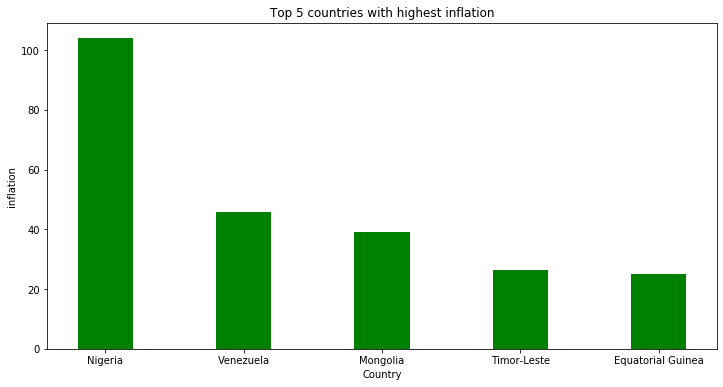

In [16]:
plt.figure(figsize=(12,6))
plt.bar(most_inflation_bar.iloc[:,0], most_inflation_bar.iloc[:,6], color ='green',  
        width = 0.4)
plt.xlabel("Country") 
plt.ylabel("inflation") 
plt.title("Top 5 countries with highest inflation") 
plt.show() 

<b> Nigeria has the highest inflation in the whole world </b>

# Data Preprocessing

finding if dataset contains any null value:

In [17]:
dataset.isnull().values.any()

False

Since I am not taking "Country" Column into account, there is no need to encode it

In [18]:
X=dataset.iloc[:,1:]

In [19]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Scaling the Data:

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(X)

In [21]:
data_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# K-Means Clustering

Elbow curve:

In [22]:
#Running K means in range of k 
from sklearn.cluster import KMeans
Percentage_of_variance = []
var = range(1,10)
for variable in var:
    kmod = KMeans(n_clusters=variable)
    kmod.fit(data_scaled)
    Percentage_of_variance.append(kmod.inertia_)

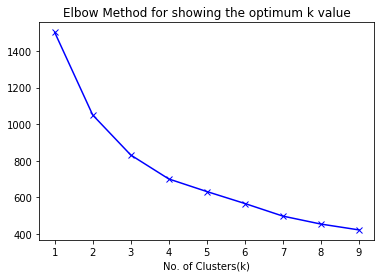

In [23]:
# Elbow of K-Means
plt.plot(var, Percentage_of_variance, 'bx-')
plt.xlabel('No. of Clusters(k)')
plt.title('Elbow Method for showing the optimum k value')
plt.show()

<b> Since we are getting a elbow at clusters=3 Therefore we will fit our scaled data into a K-Means model having 3 clusters </b>

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)

In [25]:
y_kmeans = kmeans.fit_predict(data_scaled)

In [26]:
dataset['kmeans_cluster'] =y_kmeans

In [27]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [28]:
print(kmeans.cluster_centers_)

[[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]]


In [29]:
print(kmeans.labels_)

[2 1 1 2 1 1 1 0 0 1 1 0 1 1 1 0 1 2 1 1 1 2 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 0 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 1 0 1 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 1 2 1 1 1 1 1 0 0 1 1 2 1 1 2 1 1 2 0 0 0 1 2 0 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


In [30]:
pd.Series(kmeans.labels_).value_counts()

1    84
2    47
0    36
dtype: int64

In [31]:
dataset.groupby('kmeans_cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kmeans_cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


<b> Result:
1. cluster '0' consists of all countries having high economic indicators like high gdpp, high life expectancy, low inflation, low child mortality rate thus it comprises of developed countries.
2. cluster '1' consists of all average economic indicators therefore it consists of developing countries
3. cluster '2' consists of all countries who have failed in economic indicators therefore this cluster consists of all countries which are underdeveloped and failed states </b>

# Visualisations for k-means clustering:

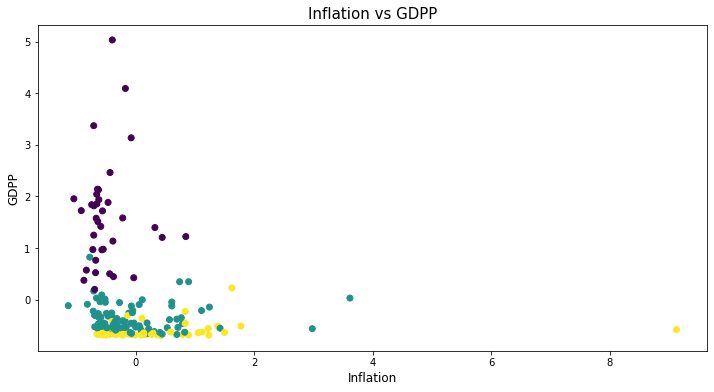

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,5],data_scaled[:,8],c=kmeans.labels_) 
plt.title("Inflation vs GDPP", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

1. As we can see "Purple" cluster have high GDP and low inflation therefore it is a cluster of Developed Countries
2. "Blue" cluster containes all developing countries
3. "Yellow" cluster containes all the underdeveloped countries 

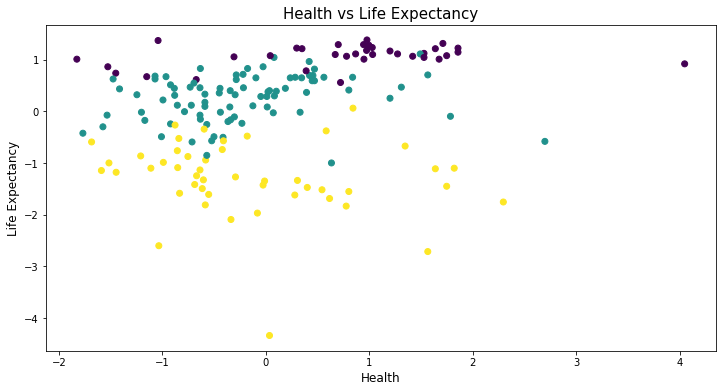

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,2],data_scaled[:,6],c=kmeans.labels_) 
plt.title("Health vs Life Expectancy", fontsize=15)
plt.xlabel("Health", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.show()

1. As we can see "Purple" cluster have high Life Expectancy therefore it is a cluster of Developed Countries
2. "Blue" cluster containes all developing countries
3. "Yellow" cluster containes all the underdeveloped countries

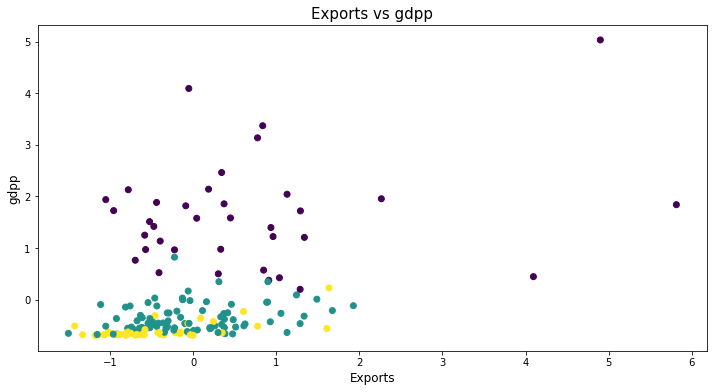

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,1],data_scaled[:,8],c=kmeans.labels_) 
plt.title("Exports vs gdpp", fontsize=15)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

1. As we can see "Purple" cluster have GDP therefore it is a cluster of Developed Countries
2. "Blue" cluster containes all developing countries
3. "Yellow" cluster containes all the underdeveloped countries

# Assesment methods

In [35]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled, kmeans.labels_)

0.28329575683463126

In [36]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
db,slc = {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

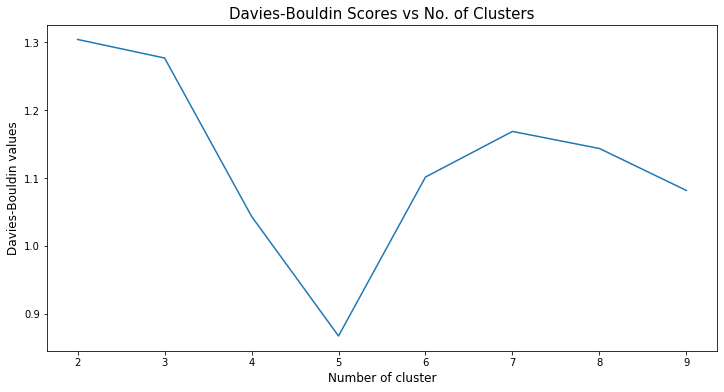

In [37]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

In [38]:
db.values()

dict_values([1.3042586920733252, 1.2769056099698288, 1.043551078235266, 0.8671489714172459, 1.1014454953684598, 1.168670111745285, 1.1435542421708427, 1.0816916562161194])

<b> Clearly, no. of clusters = 3 is the best choice here. </b>

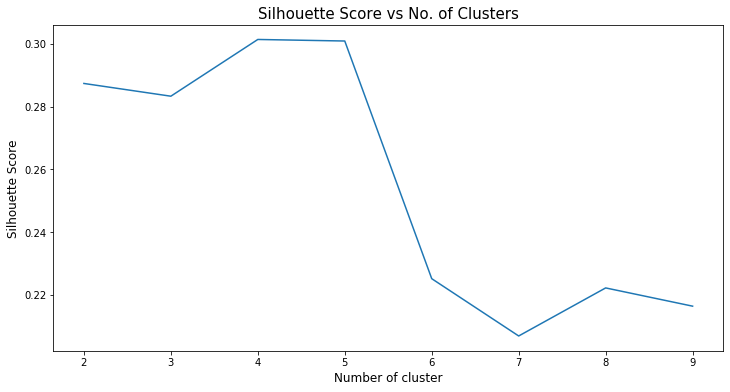

In [39]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

In [40]:
slc.values()

dict_values([0.2873566892140671, 0.28329575683463126, 0.301375962376881, 0.30088229124112015, 0.22514525980338546, 0.20688602024745156, 0.22219890556988897, 0.21638564099423846])

<b> No. of clusters = 3 seems the best choice here as well </b>

# Hierarchical Clustering

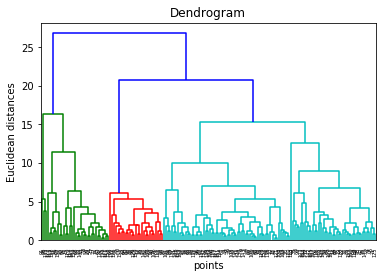

In [41]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('points')
plt.ylabel('Euclidean distances')
plt.show()

In [42]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

In [43]:
dataset['Hierarchical_cluster'] =y_hc

In [44]:
hc.labels_

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [45]:
pd.Series(hc.labels_).value_counts()

1    106
0     34
2     27
dtype: int64

In [46]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster,Hierarchical_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


<b> Visualisation for hierarchical clustering: </b>

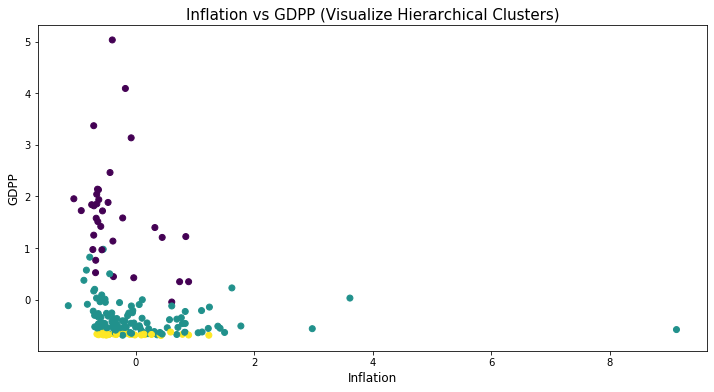

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,5],data_scaled[:,8],c=hc.labels_) 
plt.title('Inflation vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

For this pair, the plot looks similar to what we had got earlier for the KMeans. Also, observing minutely both KMeans clustering's "Inflation vs GDPP" plot and hierarchical clustering's "Inflation vs GDPP" plot, we find almost no difference in assigning cluster labels for all data points

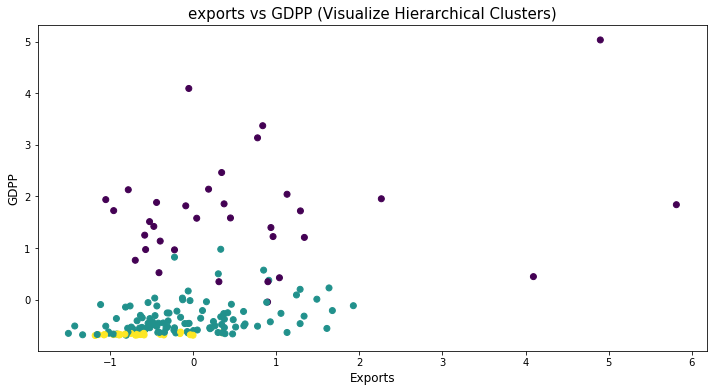

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,1],data_scaled[:,8],c=hc.labels_) 
plt.title('exports vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

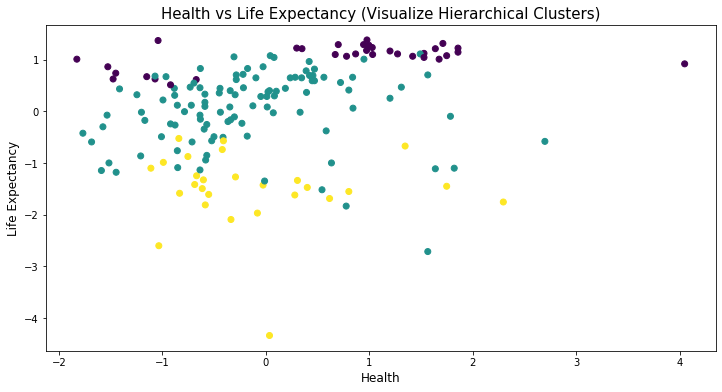

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,2],data_scaled[:,6],c=hc.labels_) 
plt.title('Health vs Life Expectancy (Visualize Hierarchical Clusters)', fontsize=15)
plt.xlabel("Health", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.show()